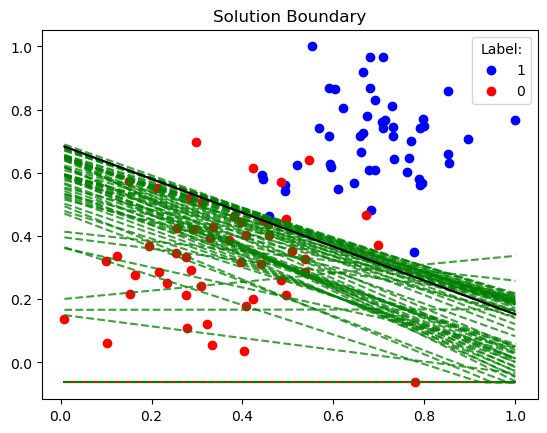

Final weights: [-4.3656865  -8.14374763]
Final bias: 5.602763376071644
Learning rate: 1
Iteration count: 65


In [139]:
# Assignment 4 Part 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

# Load data from CSV
data = pd.read_csv('data.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Initialize weights, bias, learning rate
np.random.seed(0)
features = X.shape[1]
weights = np.random.rand(features)
bias = np.random.rand()
r = 1
epochs = 65 # Training iterations

# Plot decision boundaries
def plot_boundary(weights, bias, color='green', linestyle='-', alpha=1.0):
    xMin, xMax = np.min(X[:, 0]), np.max(X[:, 0])
    yMin, yMax = np.min(X[:, 1]), np.max(X[:, 1])
    
    xx = np.linspace(xMin, xMax, 100) # Generate x values
    yy = -(weights[0] * xx + bias) / weights[1] # Generate y values

    yy = np.clip(yy, yMin, yMax)
    
    plot.plot(xx, yy, color=color, linestyle=linestyle, alpha=alpha)

# Plot the initial boundary
plot_boundary(weights, bias, color='red', linestyle='-')

# Training loop
for epoch in range(epochs):
    for i in range(X.shape[0]):
        linear_out = np.dot(X[i], weights) + bias
        prediction = 1 if linear_out >= 0 else 0
        
        # Update weights and bias if mismatched point found
        if prediction != y[i]:
            if prediction == 0:
                bias += r
                weights += r * X[i]
            else:
                bias -= r
                weights -= r * X[i]
    
    # Plot new boundary if it changed
    plot_boundary(weights, bias, color='green', linestyle='--', alpha=0.75)

# Plot the data
plot.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='1')
plot.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='0')

# Plot the decision line
plot_boundary(weights, bias, color='black', linestyle='-')

# Display the finalized data
plot.legend(title='Label:')
plot.title('Solution Boundary')
plot.show()

print("Final weights:", weights)
print("Final bias:", bias)
print("Learning rate:", r)
print("Iteration count:", iterations)

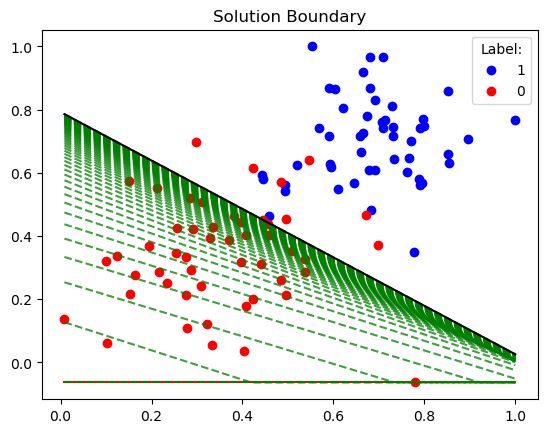

Final weights: [-14.73343221 -19.21649351]
Final bias: 15.223542026539135
Final error: -0.0122763042104623
Learning rate: 1
Iteration count: 65


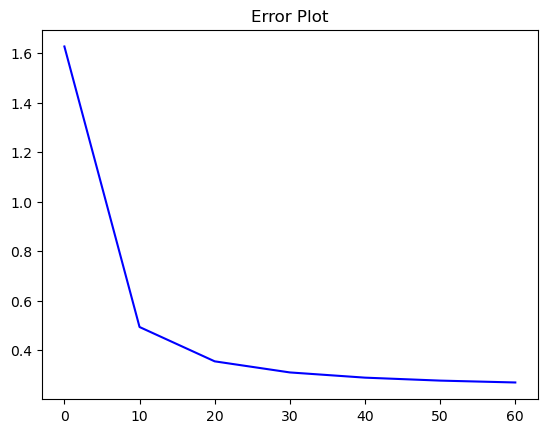

In [145]:
# Assignment 4 Part 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

# Load data from CSV
data = pd.read_csv('data.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Initialize weights, bias, learning rate
np.random.seed(0)
features = X.shape[1]
weights = np.random.rand(features)
bias = np.random.rand()
r = 1
epochs = 65 # Training iterations

# Store loss for plotting
lossValues = []
finalError = 0

# Define log loss function
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Plot decision boundaries
def plot_boundary(weights, bias, color='green', linestyle='-', alpha=1.0):
    xMin, xMax = np.min(X[:, 0]), np.max(X[:, 0])
    yMin, yMax = np.min(X[:, 1]), np.max(X[:, 1])
    
    xx = np.linspace(xMin, xMax, 100) # Generate x values
    yy = -(weights[0] * xx + bias) / weights[1] # Generate y values

    yy = np.clip(yy, yMin, yMax)
    
    plot.plot(xx, yy, color=color, linestyle=linestyle, alpha=alpha)

# Training loop
for epoch in range(epochs):
    total_loss = 0
    for i in range(X.shape[0]):
        linear_out = np.dot(X[i], weights) + bias
        prediction = 1 / (1 + np.exp(-linear_out)) #Sigmoid
        
        error = y[i] - prediction
        finalError = error
        
        bias += r * error
        weights += r * error * X[i]
        
        total_error += abs(error)

    allPredictions = 1 / (1 + np.exp(-(np.dot(X, weights) + bias)))
    loss = log_loss(y, allPredictions)

    
    if epoch == 0:
        plot_boundary(weights, bias, color='red', linestyle='-')
    
    if epoch % 10 == 0:
        lossValues.append(loss)

    plot_boundary(weights, bias, color='green', linestyle='--', alpha=0.75)


# Plot the data
plot.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='1')
plot.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='0')

# Plot the decision line
plot_boundary(weights, bias, color='black', linestyle='-')

# Display the finalized data
plot.legend(title='Label:')
plot.title('Solution Boundary')
plot.show()

print("Final weights:", weights)
print("Final bias:", bias)
print("Final error:", finalError)
print("Learning rate:", r)
print("Iteration count:", iterations)

# Plot the loss graph
plot.plot(range(0, epochs, 10), lossValues, color='blue')
plot.title('Error Plot')
plot.show()